# K-Nearest Neighbours

### Definition
- a supervised learning algorithm
- the data is 'trained' with data points corresponding to their classification. 
- To predict the class of a given data point, it considers the classes of the 'K' nearest data points, and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

### Example: 

- To predict what star is:
- If k = 3: 1A & 2B => star is B
- If k = 6: 4A & 2B => star is A
- => Thus, it depends on what value k is.
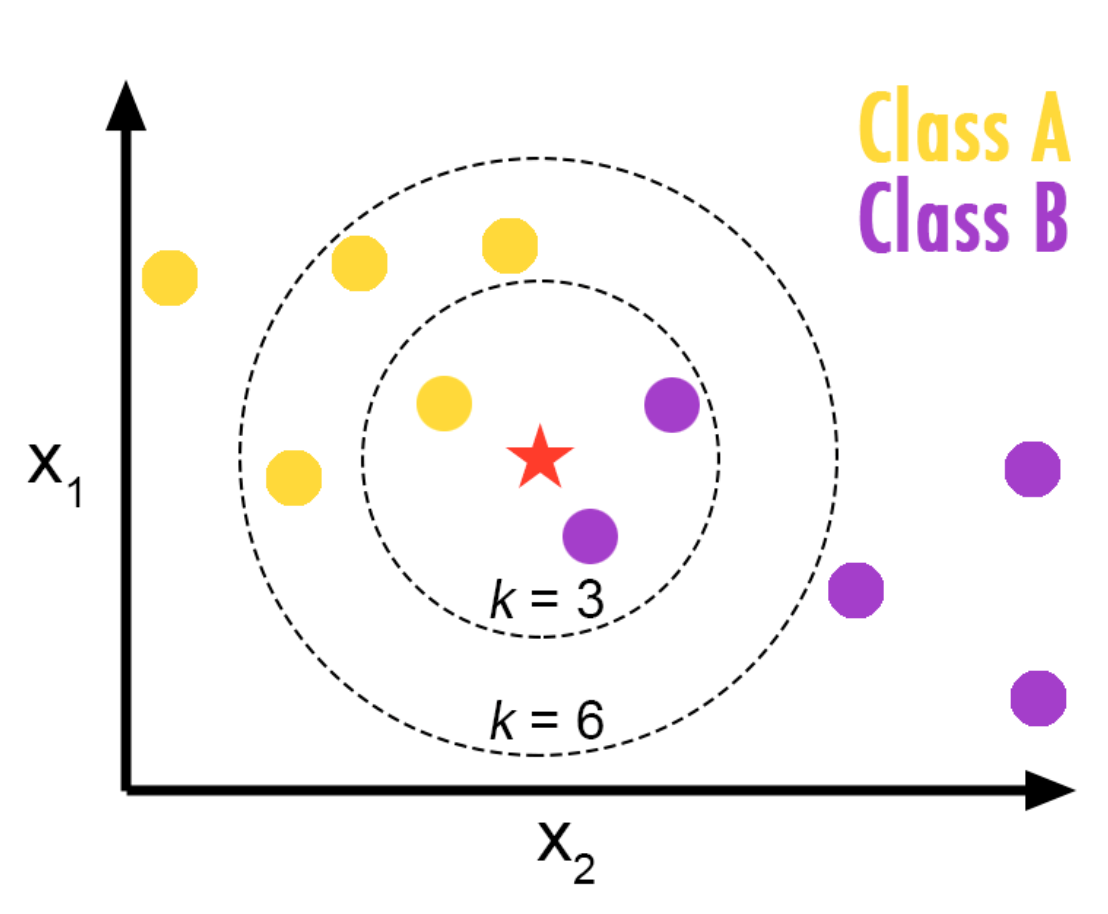

#### Step 1. Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

#### Step 2. Dataset: "custcat" 

##### source features
1. region
2. age
3. marital, etc.

##### objection: 4 groups
1. Basic Service 
2. E-Service 
3. Plus Service 
4. Total Service

##### Aim:
- to build a classifier 
- predict the class of unknown cases

##### Download: 

[Download the dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv)

In [2]:
# Read in the datset
path = "/Users/pc/Desktop/IBM AI Engineer/Machine Learning with Python/"
dataset_name = "teleCust1000t.csv"

df = pd.read_csv(path + dataset_name)
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#### Step 3. Data Visualzation and Analysis

In [3]:
# the number of each class in dataset
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Thus, we have: 
- 3 type:   281: Plius service
- 1 type:   266: Basic service
- 4 type:   236: Total service
- 2 type:   217: E-service customers

array([[<Axes: title={'center': 'income'}>]], dtype=object)

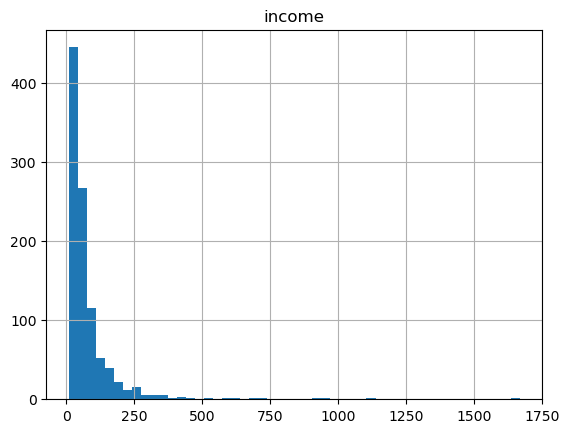

In [4]:
df.hist(column = 'income', bins = 50)

#### Step 4. Prepare the features set and the objection set

In [5]:
# define features sets X
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
# To use scikit-learn, convert pandas to numpy

# Features: all columns except for 'custcat'
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values
print(X[0:5])

# Objection: column 'custcat'
y = df[['custcat']].values
print(y[0:5])


[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]
[[1]
 [4]
 [3]
 [1]
 [3]]


#### Step 5. Train Test Split


#### Step 1. Import packages

In [7]:
from sklearn.model_selection import train_test_split
# test set: 20%, train set: 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


#### Step 6. Normalization

In order to normalize data to mean zero and variance one, which is helpful to measure the distance for KNN algorithm.

In [8]:
X_train_norm = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train_norm[0:5]

array([[-1.28618818e+00, -1.53085556e+00, -8.49354628e-01,
         1.00752834e+00, -7.46393214e-01, -4.83608776e-01,
         1.12305195e+00, -7.02283455e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02,  2.51253999e-01,  3.44957012e-01,
         1.00752834e+00,  2.45326718e-01, -2.71543263e-01,
        -5.40728715e-01, -1.25385370e-04, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-1.28618818e+00, -7.80493639e-01, -6.90113076e-01,
         1.00752834e+00, -5.21892614e-02, -4.92444839e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
        -1.01005050e+00,  1.83304333e+00],
       [-4.79805457e-02, -1.53085556e+00, -3.71629972e-01,
        -9.92527915e-01,  1.46154725e-01, -4.74772713e-01,
        -1.37261905e+00, -8.02591750e-01, -2.23313158e-01,
         9.90049504e-01, -9.33814526e-01],
       [ 1.19022709e+00, -2.17722200e-01, -6.10492300e-01,
        -9.92527915e-01, -2.50533248e-01,  2.40948394e-01,
  

#### Step 7. KNN Training Modle

- Class: from sklearn.neighbors import KNeighborsClassifier
- Suppose k = 4

In [9]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
# Train model and predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm, y_train)
neigh

X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]


/Users/pc/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[-1.13100942, -0.93533648, -0.93817795,  1.02020406, -0.36233308,
         0.17102716, -0.58336825,  0.00666863, -0.21707238, -1.13967126,
         1.97590703],
       [-1.13100942, -1.44823286, -0.13972863, -0.98019606,  0.03474427,
        -0.50017376, -0.58336825, -0.56492821, -0.21707238, -1.13967126,
        -0.90337462],
       [-1.13100942, -0.51569399,  1.53701494,  1.02020406, -0.56087175,
         0.45499678,  0.9619781 , -0.75546048, -0.21707238,  0.87744601,
         1.25608662],
       [-1.13100942, -0.74882871, -0.85833302,  1.02020406, -1.15648777,
        -0.70669712,  0.9619781 , -0.85072662, -0.21707238, -1.13967126,
         0.53626621],
       [-1.13100942,  0.51009876, -1.01802288,  1.02020406, -0.75941043,
         0.17102716,  1.73465128, -0.75546048, -0.21707238, -1.13967126,
         1.25608662]])

#### Step 8. Prediction


In [10]:
yhat = neigh.predict(X_test_norm)
yhat[0:5]

array([3, 1, 3, 2, 4])

#### Step 9. Accuracy Evaluation

- In multilabel classification, accuracy classifications coreis a function that computes subset accuracy.
- = jaccard_score function.
- Calculates how closely the actual labels and predicted labels are matched in the test set.


In [11]:
from sklearn import metrics
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print('Test  set Accuracy: ', metrics.accuracy_score(y_test,  yhat))


Train set Accuracy:  0.5475
Test  set Accuracy:  0.33


#### Example: k = 6

In [12]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm, y_train)
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
yhat = neigh.predict(X_test_norm)
print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train_norm)))
print('Test  set Accuracy: ', metrics.accuracy_score(y_test,  yhat))


Train set Accuracy:  0.5125
Test  set Accuracy:  0.335


/Users/pc/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### Example: k = 1:10

/Users/pc/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/pc/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/pc/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/pc/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

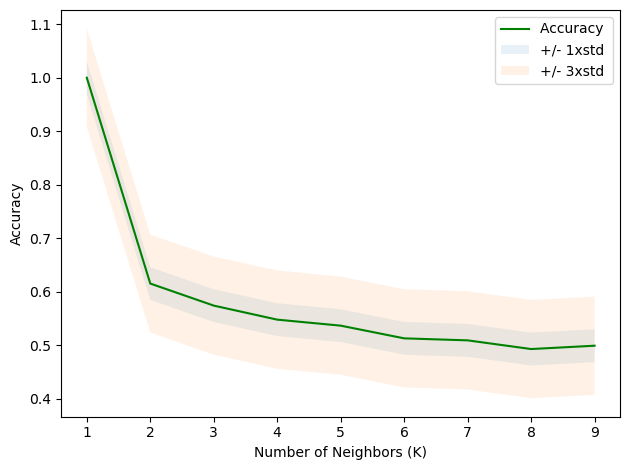

The best accuracy was with 1.0 with k =  1


In [19]:
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc  = np.zeros((Ks - 1))
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

for k in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_norm, y_train)
    yhat = neigh.predict(X_test_norm)
    
    mean_acc[k - 1] = metrics.accuracy_score(y_train, neigh.predict(X_train_norm))
    std_acc[k - 1]  = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

# Plot the model accuracy for different neighbors
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.10)
plt.legend(("Accuracy ", "+/- 1xstd", "+/- 3xstd"))
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.tight_layout()
plt.show()

print("The best accuracy was with", mean_acc.max(),
     "with k = ", mean_acc.argmax() + 1)
